<a href="https://colab.research.google.com/github/pholpaphankorn/ml-stock-price-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [167]:
%cd 'drive/MyDrive/Classroom/Machine Learning 2565-1/Project'

[Errno 2] No such file or directory: 'drive/MyDrive/Classroom/Machine Learning 2565-1/Project'
/content/drive/MyDrive/Classroom/Machine Learning 2565-1/Project


In [194]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from scipy import stats

In [169]:
meta_stock_data=pd.read_csv('meta_stock_data.csv')
spy_index_data=pd.read_csv('spy_index.csv')
sentiments_data=pd.read_csv('sentiments.csv')

In [170]:
meta_stock_data['time']= pd.to_datetime(meta_stock_data['time'])
meta_stock_data=meta_stock_data.set_index('time')
rename_columns={'open': 'stock_open', 'high': 'stock_high', 'low': 'stock_low', 'close': 'stock_close', 'volume': 'stock_volume'}
meta_stock_data.rename(columns=rename_columns, inplace=True)
meta_stock_data

,stock_open,stock_high,stock_low,stock_close,stock_volume
time,,,,,
2022-09-06 04:05:00,161.44,161.4400,161.44,161.4400,711
2022-09-06 04:10:00,160.88,160.8800,160.88,160.8800,320
2022-09-06 04:15:00,160.87,160.8700,160.87,160.8700,782
2022-09-06 04:45:00,161.28,161.7700,161.28,161.5000,1072
2022-09-06 04:50:00,161.60,161.6000,161.60,161.6000,250
...,...,...,...,...,...
2022-11-04 19:40:00,90.72,90.7200,90.70,90.7200,3255
2022-11-04 19:45:00,90.72,90.8000,90.65,90.7100,5187
2022-11-04 19:50:00,90.65,90.6901,90.65,90.6901,1433


In [171]:
spy_index_data['time']= pd.to_datetime(spy_index_data['time'])
spy_index_data=spy_index_data.set_index('time')
rename_columns={'open': 'spy_open', 'high': 'spy_high', 'low': 'spy_low', 'close': 'spy_close', 'volume': 'spy_volume'}
spy_index_data.rename(columns=rename_columns, inplace=True)
spy_index_data

,spy_open,spy_high,spy_low,spy_close,spy_volume
time,,,,,
2022-09-06 04:05:00,393.201961,393.341383,392.415218,393.082455,5700
2022-09-06 04:10:00,392.893239,392.972909,392.644270,392.713981,3809
2022-09-06 04:15:00,392.624352,392.624352,392.305672,392.514806,7663
2022-09-06 04:20:00,392.375383,392.474971,392.275796,392.474971,3424
2022-09-06 04:25:00,392.574559,392.634311,392.375383,392.375383,7496
...,...,...,...,...,...
2022-11-04 19:40:00,375.900000,375.900000,375.900000,375.900000,668
2022-11-04 19:45:00,375.860000,375.920000,375.850000,375.920000,496
2022-11-04 19:50:00,375.890000,375.890000,375.890000,375.890000,352


In [172]:
resample_rule = '5T'

sentiments_data['time_published']= pd.to_datetime(sentiments_data['time_published'])
sentiments_data = sentiments_data.set_index('time_published').resample(resample_rule,).mean().ffill()
sentiments_data

,overall_sentiment_score
time_published,
2022-09-06 04:10:00,-0.150708
2022-09-06 04:15:00,-0.150708
2022-09-06 04:20:00,-0.150708
2022-09-06 04:25:00,-0.150708
2022-09-06 04:30:00,-0.150708
...,...
2022-11-05 13:00:00,0.024357
2022-11-05 13:05:00,0.024357
2022-11-05 13:10:00,0.024357


In [173]:
df=pd.concat([meta_stock_data,spy_index_data, sentiments_data], axis=1)
df

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,161.44,161.44,161.44,161.44,711.0,393.201961,393.341383,392.415218,393.082455,5700.0,NaN
2022-09-06 04:10:00,160.88,160.88,160.88,160.88,320.0,392.893239,392.972909,392.644270,392.713981,3809.0,-0.150708
2022-09-06 04:15:00,160.87,160.87,160.87,160.87,782.0,392.624352,392.624352,392.305672,392.514806,7663.0,-0.150708
2022-09-06 04:20:00,NaN,NaN,NaN,NaN,NaN,392.375383,392.474971,392.275796,392.474971,3424.0,-0.150708
2022-09-06 04:25:00,NaN,NaN,NaN,NaN,NaN,392.574559,392.634311,392.375383,392.375383,7496.0,-0.150708
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-05 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024357
2022-11-05 13:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024357
2022-11-05 13:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024357
2022-11-05 13:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024357


In [175]:
df.dropna(thresh=9,inplace=True)
df

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,161.44,161.4400,161.44,161.4400,711.0,393.201961,393.341383,392.415218,393.082455,5700.0,NaN
2022-09-06 04:10:00,160.88,160.8800,160.88,160.8800,320.0,392.893239,392.972909,392.644270,392.713981,3809.0,-0.150708
2022-09-06 04:15:00,160.87,160.8700,160.87,160.8700,782.0,392.624352,392.624352,392.305672,392.514806,7663.0,-0.150708
2022-09-06 04:45:00,161.28,161.7700,161.28,161.5000,1072.0,392.624352,392.972909,392.624352,392.813569,48597.0,-0.150708
2022-09-06 04:50:00,161.60,161.6000,161.60,161.6000,250.0,392.813569,393.002785,392.773734,392.773734,12287.0,-0.150708
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04 19:40:00,90.72,90.7200,90.70,90.7200,3255.0,375.900000,375.900000,375.900000,375.900000,668.0,0.100364
2022-11-04 19:45:00,90.72,90.8000,90.65,90.7100,5187.0,375.860000,375.920000,375.850000,375.920000,496.0,0.100364
2022-11-04 19:50:00,90.65,90.6901,90.65,90.6901,1433.0,375.890000,375.890000,375.890000,375.890000,352.0,0.100364
2022-11-04 19:55:00,90.73,90.7300,90.63,90.6500,2778.0,375.940000,375.980000,375.670000,375.980000,11561.0,0.100364


In [182]:
values = dict([(d, df[d].mean()) for d in df.columns])
values

{'stock_open': 132.9336313285807,
 'stock_high': 133.1197831169151,
 'stock_low': 132.74718953985743,
 'stock_close': 132.92305149708358,
 'stock_volume': 248029.75981853533,
 'spy_open': 376.8817758490992,
 'spy_high': 377.1548485445885,
 'spy_low': 376.58991878939725,
 'spy_close': 376.876443553895,
 'spy_volume': 537901.8601425794,
 'overall_sentiment_score': 0.1475200711642098}

In [184]:
df.fillna(value=values,inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7715 entries, 2022-09-06 04:05:00 to 2022-11-04 20:00:00
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_open               7715 non-null   float64
 1   stock_high               7715 non-null   float64
 2   stock_low                7715 non-null   float64
 3   stock_close              7715 non-null   float64
 4   stock_volume             7715 non-null   float64
 5   spy_open                 7715 non-null   float64
 6   spy_high                 7715 non-null   float64
 7   spy_low                  7715 non-null   float64
 8   spy_close                7715 non-null   float64
 9   spy_volume               7715 non-null   float64
 10  overall_sentiment_score  7715 non-null   float64
dtypes: float64(11)
memory usage: 723.3 KB


In [186]:
df.describe()

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
count,7715.000000,7715.000000,7715.000000,7715.000000,7.715000e+03,7715.000000,7715.000000,7715.000000,7715.000000,7.715000e+03,7715.000000
mean,132.933631,133.119783,132.747190,132.923051,2.480298e+05,376.881776,377.154849,376.589919,376.876444,5.379019e+05,0.147520
std,20.370500,20.364002,20.370256,20.375117,4.958005e+05,12.676892,12.647049,12.705118,12.674710,8.596410e+05,0.178308
min,88.300000,88.579800,88.090000,88.300000,1.000000e+02,348.360000,349.240000,348.110000,348.370000,1.040000e+02,-0.598558
25%,128.655000,128.810000,128.495000,128.679500,2.481000e+03,366.640000,366.955000,366.280000,366.634950,1.332050e+04,0.033242
50%,135.995000,136.120000,135.830000,136.000000,3.370200e+04,375.300000,375.530000,374.990000,375.290000,1.701590e+05,0.165882
75%,144.554450,144.725000,144.425050,144.530000,3.232575e+05,385.860000,386.100000,385.560000,385.830000,8.121525e+05,0.269726
max,171.110000,171.390000,170.840000,171.090000,1.643237e+07,412.521967,413.308709,412.123616,412.292915,1.952209e+07,0.706399


In [188]:
dataCorr=df.corr()
dataCorr

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
stock_open,1.000000,0.999790,0.999877,0.999859,-0.254587,0.306669,0.306803,0.305969,0.306759,-0.004209,0.008578
stock_high,0.999790,1.000000,0.999582,0.999686,-0.249004,0.306572,0.306925,0.305849,0.306812,-0.000565,0.008356
stock_low,0.999877,0.999582,1.000000,0.999927,-0.259381,0.306451,0.306558,0.306029,0.306753,-0.008476,0.008794
stock_close,0.999859,0.999686,0.999927,1.000000,-0.254977,0.306176,0.306457,0.305683,0.306616,-0.004703,0.008412
stock_volume,-0.254587,-0.249004,-0.259381,-0.254977,1.000000,0.057953,0.064565,0.051744,0.058016,0.434654,-0.002874
spy_open,0.306669,0.306572,0.306451,0.306176,0.057953,1.000000,0.999558,0.999307,0.999350,-0.051803,0.040272
spy_high,0.306803,0.306925,0.306558,0.306457,0.064565,0.999558,1.000000,0.998856,0.999453,-0.042757,0.039540
spy_low,0.305969,0.305849,0.306029,0.305683,0.051744,0.999307,0.998856,1.000000,0.999445,-0.063075,0.040180
spy_close,0.306759,0.306812,0.306753,0.306616,0.058016,0.999350,0.999453,0.999445,1.000000,-0.053010,0.039843
spy_volume,-0.004209,-0.000565,-0.008476,-0.004703,0.434654,-0.051803,-0.042757,-0.063075,-0.053010,1.000000,0.017770


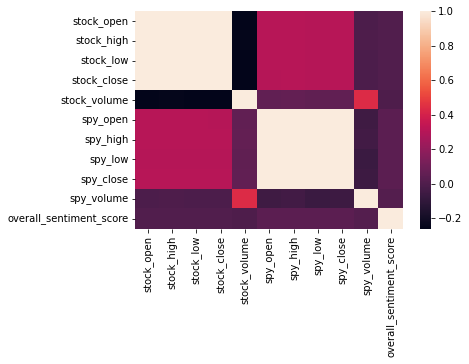

In [189]:
sns.heatmap(dataCorr)

In [191]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.999790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2,0.999877,0.999582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
3,0.999859,0.999686,0.999927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
4,-0.254587,-0.249004,-0.259381,-0.254977,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
5,0.306669,0.306572,0.306451,0.306176,0.057953,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
6,0.306803,0.306925,0.306558,0.306457,0.064565,0.999558,0.000000,0.000000,0.000000,0.00000,0.0
7,0.305969,0.305849,0.306029,0.305683,0.051744,0.999307,0.998856,0.000000,0.000000,0.00000,0.0
8,0.306759,0.306812,0.306753,0.306616,0.058016,0.999350,0.999453,0.999445,0.000000,0.00000,0.0
9,-0.004209,-0.000565,-0.008476,-0.004703,0.434654,-0.051803,-0.042757,-0.063075,-0.053010,0.00000,0.0


In [192]:
to_drop = [column for column in lower if any(np.absolute(lower[column]) > 0.90)]
print('to_drop',to_drop)
df.drop(to_drop, inplace=True, axis=1)
df

to_drop ['stock_open', 'stock_high', 'stock_low', 'spy_open', 'spy_high', 'spy_low']


,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,161.4400,711.0,393.082455,5700.0,0.147520
2022-09-06 04:10:00,160.8800,320.0,392.713981,3809.0,-0.150708
2022-09-06 04:15:00,160.8700,782.0,392.514806,7663.0,-0.150708
2022-09-06 04:45:00,161.5000,1072.0,392.813569,48597.0,-0.150708
2022-09-06 04:50:00,161.6000,250.0,392.773734,12287.0,-0.150708
...,...,...,...,...,...
2022-11-04 19:40:00,90.7200,3255.0,375.900000,668.0,0.100364
2022-11-04 19:45:00,90.7100,5187.0,375.920000,496.0,0.100364
2022-11-04 19:50:00,90.6901,1433.0,375.890000,352.0,0.100364
2022-11-04 19:55:00,90.6500,2778.0,375.980000,11561.0,0.100364


In [195]:
df = stats.zscore(df)
df

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,1.399687,-0.498860,1.278693,-0.619138,0.000000
2022-09-06 04:10:00,1.372201,-0.499648,1.249619,-0.621338,-1.672652
2022-09-06 04:15:00,1.371710,-0.498716,1.233904,-0.616854,-1.672652
2022-09-06 04:45:00,1.402632,-0.498131,1.257477,-0.569234,-1.672652
2022-09-06 04:50:00,1.407541,-0.499789,1.254334,-0.611475,-1.672652
...,...,...,...,...,...
2022-11-04 19:40:00,-2.071438,-0.493728,-0.077044,-0.624992,-0.264481
2022-11-04 19:45:00,-2.071929,-0.489831,-0.075466,-0.625192,-0.264481
2022-11-04 19:50:00,-2.072905,-0.497403,-0.077833,-0.625360,-0.264481
2022-11-04 19:55:00,-2.074874,-0.494690,-0.070732,-0.612320,-0.264481


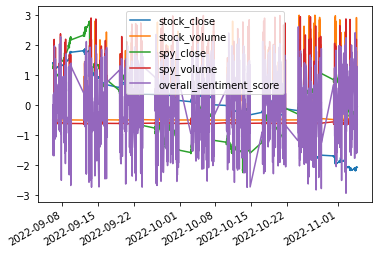

In [197]:
df.plot()

In [198]:
for c in df.columns:
  df.loc[(df[c] > 3) | (df[c] < -3) , c] = df[c].median()
df

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,1.399687,-0.498860,1.278693,-0.619138,0.000000
2022-09-06 04:10:00,1.372201,-0.499648,1.249619,-0.621338,-1.672652
2022-09-06 04:15:00,1.371710,-0.498716,1.233904,-0.616854,-1.672652
2022-09-06 04:45:00,1.402632,-0.498131,1.257477,-0.569234,-1.672652
2022-09-06 04:50:00,1.407541,-0.499789,1.254334,-0.611475,-1.672652
...,...,...,...,...,...
2022-11-04 19:40:00,-2.071438,-0.493728,-0.077044,-0.624992,-0.264481
2022-11-04 19:45:00,-2.071929,-0.489831,-0.075466,-0.625192,-0.264481
2022-11-04 19:50:00,-2.072905,-0.497403,-0.077833,-0.625360,-0.264481
2022-11-04 19:55:00,-2.074874,-0.494690,-0.070732,-0.612320,-0.264481


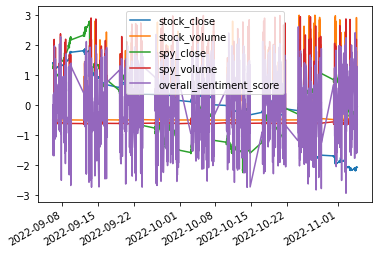

In [199]:
df.plot()